## Initialization

In [1]:
import pandas as pd

In [3]:
years = list(range(1999, 2024))

In [4]:
csv_files = [f"./Data/play_by_play_{year}.csv" for year in years]

In [5]:
# load each csv file as a dataframe and collect them in a list
dataframes = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes.append(df)

C:\Users\Tim\AppData\Local\Temp\ipykernel_12832\2200896479.py:4: DtypeWarning: Columns (36,37,179,180,189,190,197,198,203,204,205,206,213,214,218,219,220,222,224,226,248,249,253,254,255,260,262,263,266,267,268,269,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\Tim\AppData\Local\Temp\ipykernel_12832\2200896479.py:4: DtypeWarning: Columns (37,45,179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,248,249,253,254,255,260,262,263,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\Tim\AppData\Local\Temp\ipykernel_12832\2200896479.py:4: DtypeWarning: Columns (37,179,180,182,183,189,190,193,194,197,198,203,204,205,206,209,210,213,214,218,219,220,248,249,253,254,255,260,262,263,266,267,268,269,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\Tim\AppData\Local\Te

## Removal of Useless Observations
Thilo & Tok

In [6]:
list(dataframes[0]["play_type"].unique())

['kickoff',
 'pass',
 'run',
 'no_play',
 'punt',
 'extra_point',
 nan,
 'field_goal',
 'qb_kneel',
 'qb_spike']

In [7]:
# remove useless plays from dataframes to reduce size for combining dataframes
for dataframe in dataframes:
    dataframe.drop(
        dataframe[~dataframe["play_type"].isin(["pass", "run"])].index,
        axis=0,
        inplace=True,
    )

In [8]:
# combine all dataframes into a single one
combined_df = pd.concat(dataframes, axis=0)

# reset the index of the combined dataframe
combined_df.reset_index(drop=True, inplace=True)

In [9]:
# with penalty = 1 higher avg yards_gained -> biased (free plays etc)

display(combined_df[combined_df['penalty'] == 1].describe())
display(combined_df[combined_df['penalty'] == 0].describe())

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,11534.000000,1.153400e+04,11534.000000,11534.000000,11534.000000,11534.000000,11534.000000,11534.0,11519.000000,11534.000000,...,11534.000000,11534.000000,11533.000000,3844.000000,3845.000000,3845.000000,3844.000000,3845.000000,9007.000000,9007.000000
mean,2132.940697,2.012097e+09,9.155714,51.485694,424.667765,820.983007,1670.419456,0.0,12.369997,0.050286,...,0.165164,0.486822,0.398547,0.748358,5.736086,3.895709,0.761383,0.575227,0.636371,0.446424
std,1150.870456,6.481710e+06,5.270094,23.562159,264.436042,523.902971,994.774742,0.0,6.737591,0.218544,...,0.371344,0.499848,2.089945,0.503435,2.611753,2.623593,0.261456,0.361138,0.238776,41.708884
min,49.000000,2.001091e+09,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,-12.004683,0.007620,0.472008,0.000000,0.042334,0.015083,0.019738,-98.966426
25%,1167.250000,2.006120e+09,4.000000,34.000000,190.000000,352.000000,815.000000,0.0,7.000000,0.000000,...,0.000000,0.000000,-0.879191,0.327952,3.835772,2.000000,0.540612,0.237832,0.459961,-40.501495
50%,2174.000000,2.012120e+09,9.000000,54.000000,410.000000,804.000000,1685.000000,0.0,12.000000,0.000000,...,0.000000,0.000000,0.827637,0.643031,4.823173,3.000000,0.973276,0.472677,0.609699,4.843175
75%,3086.000000,2.018091e+09,14.000000,71.000000,648.000000,1265.750000,2467.750000,0.0,18.000000,0.000000,...,0.000000,1.000000,1.731540,1.059105,7.402649,6.000000,1.000000,0.999369,0.871488,34.130779
max,5417.000000,2.023111e+09,22.000000,99.000000,900.000000,1800.000000,3600.000000,0.0,36.000000,1.000000,...,1.000000,1.000000,8.217517,5.539811,20.378528,19.000000,1.000000,1.000000,0.997580,93.411094


,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,809471.000000,8.094710e+05,809471.000000,809471.000000,809470.000000,809470.000000,809470.000000,809471.0,808184.000000,809471.000000,...,809471.000000,809471.000000,809458.000000,288981.000000,289028.000000,289028.000000,289028.000000,289028.000000,580864.000000,580863.000000
mean,2049.951944,2.011057e+09,9.467996,51.545796,438.927020,851.767150,1743.226006,0.0,12.019889,0.040109,...,0.086171,0.489294,-0.011226,0.692751,5.281754,3.447604,0.795564,0.596574,0.611754,-0.835551
std,1203.594356,7.098436e+06,5.303768,24.435017,271.323143,541.837218,1047.747338,0.0,7.056548,0.196215,...,0.280617,0.499886,1.352293,0.508918,2.415121,2.409927,0.247647,0.356393,0.240294,42.079098
min,20.000000,1.999091e+09,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,-13.584859,-1.282040,0.210289,0.000000,0.010270,0.000000,0.010676,-99.512959
25%,1002.000000,2.005101e+09,5.000000,33.000000,193.000000,362.000000,831.000000,0.0,6.000000,0.000000,...,0.000000,0.000000,-0.617443,0.309432,3.656239,2.000000,0.582691,0.244902,0.444209,-41.875692
50%,2053.000000,2.011111e+09,9.000000,55.000000,431.000000,846.000000,1796.000000,0.0,12.000000,0.000000,...,0.000000,0.000000,-0.200152,0.571406,4.507349,3.000000,0.987613,0.510156,0.570346,4.136908
75%,3060.000000,2.017111e+09,14.000000,72.000000,675.000000,1321.000000,2638.000000,0.0,18.000000,0.000000,...,0.000000,1.000000,0.663116,0.928549,6.417842,5.000000,1.000000,0.999181,0.834522,34.269929
max,5899.000000,2.023111e+09,22.000000,99.000000,900.000000,1800.000000,3600.000000,0.0,38.000000,1.000000,...,1.000000,1.000000,9.129719,13.028143,34.043324,48.000000,1.000000,1.000000,0.998187,97.995057


In [10]:
# drop plays with penalties
combined_df.drop(combined_df[combined_df["penalty"] == 1].index, axis=0, inplace=True)

In [11]:
# drop two point conversion plays
combined_df.drop(
    combined_df[~combined_df["two_point_conv_result"].isna()].index, axis=0, inplace=True
)

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,228.000000,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,...,228.000000,228.000000,228.000000,163.000000,163.000000,163.000000,163.000000,163.000000,168.000000,168.000000
mean,3543.951754,2.011680e+09,9.390351,66.245614,95.144737,158.302632,497.776316,0.0,20.228070,0.048246,...,0.214912,0.574561,0.291306,0.384662,5.274676,3.374233,0.791432,0.534365,0.901857,9.814276
std,1103.070689,7.223624e+06,5.047029,18.678623,202.278652,360.994943,890.812448,0.0,6.931426,0.214756,...,0.411665,0.495497,1.275671,0.534754,2.314040,2.666865,0.284042,0.357368,0.160804,16.080427
min,149.000000,1.999100e+09,1.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,...,0.000000,0.000000,-2.009599,-1.282040,2.822006,0.000000,0.017248,0.017248,0.193466,0.237936
25%,3267.500000,2.005113e+09,5.000000,58.000000,4.000000,4.000000,5.000000,0.0,17.750000,0.000000,...,0.000000,0.000000,-0.072719,0.068531,3.580416,1.000000,0.560816,0.235674,0.909609,1.116320
50%,3986.500000,2.012102e+09,9.000000,70.000000,9.000000,9.000000,10.500000,0.0,22.000000,0.000000,...,0.000000,1.000000,0.012209,0.159794,4.332223,2.000000,0.996231,0.383546,0.973584,2.641600
75%,4222.500000,2.018102e+09,14.000000,80.000000,45.750000,48.250000,485.500000,0.0,25.000000,0.000000,...,0.000000,1.000000,0.286239,0.523876,6.830261,5.000000,1.000000,0.993848,0.988837,9.039125
max,5129.000000,2.023111e+09,21.000000,99.000000,900.000000,1708.000000,3508.000000,0.0,32.000000,1.000000,...,1.000000,1.000000,6.998616,2.803931,12.302560,12.000000,1.000000,1.000000,0.997621,80.653375


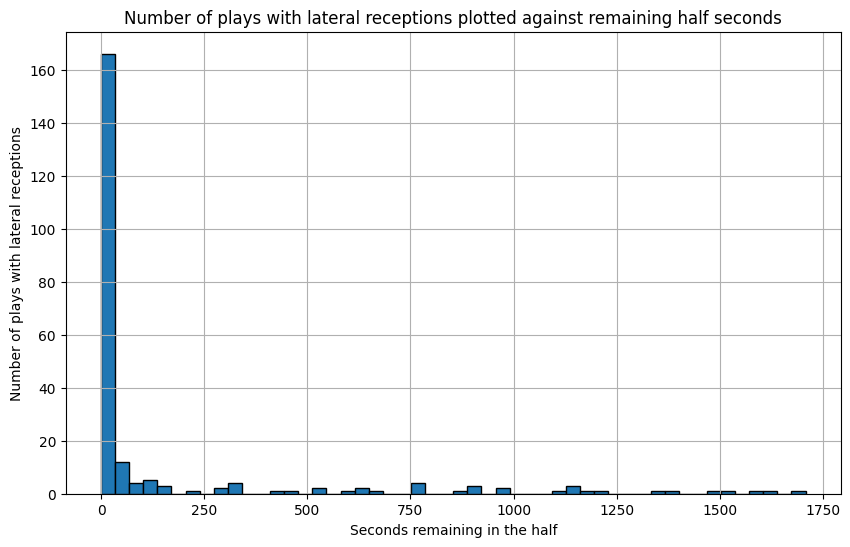

In [12]:
import matplotlib.pyplot as plt

# 75 perc. quant. is at 48 sec / half -> only end of half -> biased

display(combined_df[combined_df['lateral_reception'] == 1].describe())

lateral_reception_entries = combined_df[combined_df['lateral_reception'] == 1]

# grouped by 'half_seconds_remaining' and count number of occurrences
grouped_data = lateral_reception_entries.groupby('half_seconds_remaining').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.hist(lateral_reception_entries['half_seconds_remaining'], bins=50, edgecolor='black')
plt.title('Number of plays with lateral receptions plotted against remaining half seconds')
plt.xlabel('Seconds remaining in the half')
plt.ylabel('Number of plays with lateral receptions')
plt.grid(True)
plt.show()

In [13]:
# drop plays with laterals
combined_df.drop(
    combined_df[combined_df["lateral_reception"] == 1].index, axis=0, inplace=True
)

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,43.000000,4.300000e+01,43.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.000000,43.000000,...,43.000000,43.000000,43.000000,0.0,0.0,0.0,0.0,0.0,38.000000,38.000000
mean,2065.837209,2.013843e+09,9.558140,47.581395,340.255814,696.069767,1742.581395,0.0,11.651163,0.116279,...,0.255814,0.558140,0.546209,NaN,NaN,NaN,NaN,NaN,0.681186,-54.960669
std,1256.697011,6.824716e+06,5.615889,21.358875,279.379252,570.393239,1064.072729,0.0,6.927804,0.324353,...,0.441481,0.502486,1.897068,NaN,NaN,NaN,NaN,NaN,0.236124,31.627400
min,197.000000,2.000122e+09,1.000000,4.000000,1.000000,1.000000,3.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,-7.195153,NaN,NaN,NaN,NaN,NaN,0.281833,-99.479574
25%,927.000000,2.009097e+09,4.000000,34.500000,104.000000,115.000000,872.000000,0.0,5.500000,0.000000,...,0.000000,0.000000,-0.214757,NaN,NaN,NaN,NaN,NaN,0.481894,-84.268185
50%,1876.000000,2.014103e+09,9.000000,50.000000,258.000000,676.000000,1849.000000,0.0,12.000000,0.000000,...,0.000000,1.000000,0.689823,NaN,NaN,NaN,NaN,NaN,0.654358,-52.922902
75%,3236.000000,2.019617e+09,14.500000,61.000000,597.000000,1190.500000,2604.500000,0.0,16.500000,0.000000,...,0.500000,1.000000,1.454377,NaN,NaN,NaN,NaN,NaN,0.925644,-38.910815
max,4417.000000,2.023111e+09,22.000000,82.000000,900.000000,1793.000000,3457.000000,0.0,28.000000,1.000000,...,1.000000,1.000000,5.595869,NaN,NaN,NaN,NaN,NaN,0.994796,6.879920


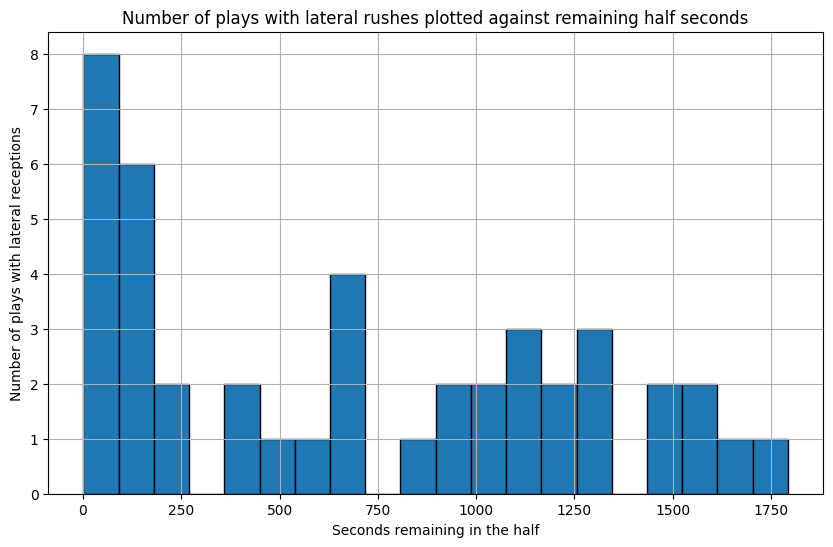

In [14]:
# don't drop -> lateral rushs also end around or trick plays -> same reasoning as above, but other way around

display(combined_df[combined_df['lateral_rush'] == 1].describe())

lateral_rush_entries = combined_df[combined_df['lateral_rush'] == 1]

# grouped by 'half_seconds_remaining' and count number of occurrences
grouped_data = lateral_rush_entries.groupby('half_seconds_remaining').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.hist(lateral_rush_entries['half_seconds_remaining'], bins=20, edgecolor='black')
plt.title('Number of plays with lateral rushes plotted against remaining half seconds')
plt.xlabel('Seconds remaining in the half')
plt.ylabel('Number of plays with lateral receptions')
plt.grid(True)
plt.show()

In [15]:
# don't drop -> doesn't change anything if replayed or not

display(combined_df[combined_df['replay_or_challenge'] == 1].describe())

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,7719.000000,7.719000e+03,7719.000000,7719.000000,7719.000000,7719.000000,7719.000000,7719.0,7706.000000,7719.000000,...,7719.000000,7719.000000,7719.000000,3699.000000,3701.000000,3701.000000,3701.000000,3701.000000,6035.000000,6035.000000
mean,2290.828864,2.011830e+09,9.519497,42.832232,373.158699,688.316103,1534.798808,0.0,13.096678,0.158181,...,0.161809,0.487498,-0.156773,0.781994,4.699556,2.878681,0.860569,0.741843,0.690672,11.496143
std,1191.255596,6.612087e+06,5.342370,27.053415,275.637532,536.437723,1011.481942,0.0,6.918840,0.364934,...,0.368299,0.499876,2.522683,0.820116,2.521296,2.074460,0.223948,0.323306,0.258186,33.937908
min,51.000000,1.999091e+09,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,-13.584859,-0.521982,0.276749,0.000000,0.026688,0.021646,0.021525,-98.560274
25%,1339.000000,2.006122e+09,5.000000,19.000000,116.000000,157.000000,616.000000,0.0,8.000000,0.000000,...,0.000000,0.000000,-1.126150,0.300886,3.245168,2.000000,0.703949,0.431690,0.470278,1.932070
50%,2237.000000,2.012113e+09,10.000000,44.000000,330.000000,621.000000,1628.000000,0.0,13.000000,0.000000,...,0.000000,0.000000,-0.200167,0.562153,4.099234,2.000000,0.998955,0.994828,0.742387,8.175039
75%,3294.000000,2.017113e+09,14.000000,66.000000,610.000000,1126.000000,2287.000000,0.0,19.000000,0.000000,...,0.000000,1.000000,1.477646,0.972308,5.551922,4.000000,1.000000,1.000000,0.942655,35.927540
max,5401.000000,2.023111e+09,22.000000,99.000000,900.000000,1800.000000,3600.000000,0.0,38.000000,1.000000,...,1.000000,1.000000,7.904483,11.146741,18.862334,18.000000,1.000000,1.000000,0.996400,91.209327


In [16]:
# plays where the snap is mishandled or dropped etc
display(combined_df[combined_df['aborted_play'] == 1].describe())

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,2869.000000,2.869000e+03,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.0,2864.000000,2869.000000,...,2869.000000,2869.000000,2869.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1952.000000,1952.000000
mean,1977.826420,2.010213e+09,9.359359,49.136284,446.264901,878.540955,1805.832694,0.0,11.753142,0.039735,...,0.016382,0.488672,-2.160798,0.764139,6.085294,4.350000,0.728115,0.572227,0.585338,-48.800173
std,1192.707005,7.142341e+06,5.393010,25.264374,270.881476,530.598320,1041.981990,0.0,7.078386,0.195370,...,0.126962,0.499959,2.014690,0.553818,3.091304,3.208838,0.295245,0.371091,0.246955,33.965611
min,51.000000,1.999091e+09,1.000000,1.000000,0.000000,0.000000,3.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,-12.866168,0.136530,0.539623,0.000000,0.061383,0.032534,0.024370,-99.163836
25%,913.000000,2.004093e+09,5.000000,30.000000,196.000000,420.000000,906.000000,0.0,6.000000,0.000000,...,0.000000,0.000000,-3.505222,0.319769,3.818067,2.000000,0.493213,0.233105,0.421833,-72.480789
50%,1959.000000,2.010093e+09,9.000000,52.000000,446.000000,895.000000,1829.000000,0.0,11.000000,0.000000,...,0.000000,0.000000,-1.407778,0.593810,4.851438,3.000000,0.905781,0.503903,0.523381,-48.416530
75%,2952.000000,2.016121e+09,14.000000,70.000000,679.000000,1333.000000,2700.000000,0.0,17.000000,0.000000,...,0.000000,1.000000,-0.838870,1.095944,8.347498,7.000000,1.000000,0.998139,0.803817,-33.311549
max,5180.000000,2.023111e+09,22.000000,99.000000,900.000000,1800.000000,3600.000000,0.0,32.000000,1.000000,...,1.000000,1.000000,6.864812,2.828045,14.400057,12.000000,1.000000,1.000000,0.994113,82.746983


In [17]:
# drop aborted plays
combined_df.drop(
    combined_df[combined_df["aborted_play"] == 1].index, axis=0, inplace=True
)

In [18]:
len(list(combined_df["start_time"].unique()))

175

In [19]:
len(list(combined_df["passer_id"].unique()))

791

In [24]:
# Erstelle eine Maske für 'pass_type' == 'pass'
pass_mask = combined_df['play_type'] == 'pass'

# Filtere den DataFrame, um nur die 'pass'-Einträge zu erhalten
pass_plays_df = combined_df[pass_mask]

# Zähle die Anzahl der Pass-Einträge pro Passer und Spiel
passer_game_counts = pass_plays_df.groupby(['passer_id', 'game_id']).size().reset_index(name='count')

# Filtere die Passer, die in mindestens einem Spiel 14 Pässe geworfen haben
passers_with_14_passes = set(passer_game_counts[passer_game_counts['count'] >= 14]['passer_id'])

# Filtere die 'pass'-Einträge, bei denen die passer_id nicht in passers_with_14_passes ist
filtered_pass_plays_df = pass_plays_df[pass_plays_df['passer_id'].isin(passers_with_14_passes)]
filtered_nopass_plays_df = pass_plays_df[~pass_plays_df['passer_id'].isin(passers_with_14_passes)]

pd.set_option("display.max_columns", None)

display(filtered_pass_plays_df.describe())
display(filtered_nopass_plays_df.describe())


# Füge die 'run'-Einträge wieder hinzu
filtered_df = pd.concat([combined_df[~pass_mask], filtered_pass_plays_df])

# Ergebnis anzeigen
pd.set_option("display.max_columns", None)

#display(filtered_df.describe())
#display(combined_df.describe())
print(len(passers_with_14_passes))

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passing_yards,receiving_yards,rushing_yards,lateral_receiving_yards,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,tackle_with_assist,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv,season,cp,cpoe,series,series_success,order_sequence,play_clock,play_deleted,special_teams_play,fixed_drive,drive_play_count,drive_first_downs,drive_inside20,drive_ended_with_score,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,463623.000000,4.636230e+05,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.0,462929.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,462929.000000,463623.000000,463623.000000,463623.000000,463623.0,463623.0,463623.0,463623.000000,315493.000000,197836.000000,0.0,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.0,463623.0,463623.000000,463622.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,463623.000000,315446.000000,315445.000000,336821.000000,336820.000000,336945.000000,

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passing_yards,receiving_yards,rushing_yards,lateral_receiving_yards,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,tackle_with_assist,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv,season,cp,cpoe,series,series_success,order_sequence,play_clock,play_deleted,special_teams_play,fixed_drive,drive_play_count,drive_first_downs,drive_inside20,drive_ended_with_score,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,1437.000000,1.437000e+03,1437.000000,1437.000000,1436.000000,1436.000000,1436.000000,1437.0,1435.000000,1437.000000,1437.000000,1436.000000,1437.000000,1437.000000,1435.000000,1437.000000,1437.000000,1437.000000,1437.0,1437.0,1437.0,1437.0,797.000000,410.000000,0.0,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.00000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.0,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,797.000000,797.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437

330


In [27]:
# Erstelle eine Maske für 'pass_type' == 'pass'
pass_mask = combined_df['play_type'] == 'pass'

# Filtere den DataFrame, um nur die 'pass'-Einträge zu erhalten
pass_plays_df = combined_df[pass_mask]

# Zähle die Anzahl der Pass-Einträge pro Passer und Spiel
passer_game_counts = pass_plays_df.groupby(['passer_id', 'season']).size().reset_index(name='count')

# Filtere die Passer, die in mindestens einem Spiel 14 Pässe geworfen haben
passers_with_14_passes = set(passer_game_counts[passer_game_counts['count'] >= 224]['passer_id'])

# Filtere die 'pass'-Einträge, bei denen die passer_id nicht in passers_with_14_passes ist
filtered_pass_plays_df = pass_plays_df[pass_plays_df['passer_id'].isin(passers_with_14_passes)]
filtered_nopass_plays_df = pass_plays_df[~pass_plays_df['passer_id'].isin(passers_with_14_passes)]


display(filtered_pass_plays_df.describe())
display(filtered_nopass_plays_df.describe())


# Füge die 'run'-Einträge wieder hinzu
filtered_df = pd.concat([combined_df[~pass_mask], filtered_pass_plays_df])

# Ergebnis anzeigen
pd.set_option("display.max_columns", None)

display(filtered_df.describe())
display(combined_df.describe())
print(len(passers_with_14_passes))

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passing_yards,receiving_yards,rushing_yards,lateral_receiving_yards,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,tackle_with_assist,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv,season,cp,cpoe,series,series_success,order_sequence,play_clock,play_deleted,special_teams_play,fixed_drive,drive_play_count,drive_first_downs,drive_inside20,drive_ended_with_score,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,443131.000000,4.431310e+05,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.0,442437.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,442437.000000,443131.000000,443131.000000,443131.000000,443131.0,443131.0,443131.0,443131.000000,303068.000000,190541.000000,0.0,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.0,443131.0,443131.000000,443130.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,443131.000000,303021.000000,303020.000000,323285.000000,323284.000000,323408.000000,

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passing_yards,receiving_yards,rushing_yards,lateral_receiving_yards,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,tackle_with_assist,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv,season,cp,cpoe,series,series_success,order_sequence,play_clock,play_deleted,special_teams_play,fixed_drive,drive_play_count,drive_first_downs,drive_inside20,drive_ended_with_score,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,21929.000000,2.192900e+04,21929.000000,21929.000000,21928.000000,21928.000000,21928.000000,21929.0,21927.000000,21929.000000,21929.000000,21928.000000,21929.000000,21929.000000,21927.000000,21929.000000,21929.000000,21929.000000,21929.0,21929.0,21929.0,21929.000000,13222.000000,7705.000000,0.0,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.0,21929.0,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,21929.000000,13222.000000,13222.000000,14418.000000,14418.000000,14419.000000,14419.000000,14419.000000,14419.000000,14419.000000,14419.0

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passing_yards,receiving_yards,rushing_yards,lateral_receiving_yards,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,tackle_with_assist,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv,season,cp,cpoe,series,series_success,order_sequence,play_clock,play_deleted,special_teams_play,fixed_drive,drive_play_count,drive_first_downs,drive_inside20,drive_ended_with_score,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,782338.000000,7.823380e+05,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.0,781109.000000,782338.000000,782338.000000,782338.000000,782336.000000,782338.000000,781109.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.0,782338.0,782338.000000,303068.000000,190542.000000,0.0,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.0,782338.0,782327.000000,782325.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,782338.000000,303021.000000,303020.000000,564201.000000,564200.000000,564325.00

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passing_yards,receiving_yards,rushing_yards,lateral_receiving_yards,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,tackle_with_assist,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv,season,cp,cpoe,series,series_success,order_sequence,play_clock,play_deleted,special_teams_play,fixed_drive,drive_play_count,drive_first_downs,drive_inside20,drive_ended_with_score,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,804267.000000,8.042670e+05,804267.000000,804267.000000,804266.000000,804266.000000,804266.000000,804267.0,803036.000000,804267.000000,804267.000000,804266.000000,804265.000000,804267.000000,803036.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.0,804267.0,804267.000000,316290.000000,198247.000000,0.0,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.0,804267.0,804256.000000,804254.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,804267.000000,316243.000000,316242.000000,578619.000000,578618.000000,578744.00

199


In [ ]:
# adjust the spread line to the view of the team with possession of the ball
combined_df.loc[combined_df['posteam_type'] == 'away', 'spread_line'] *= -1

## Handling of Missing Values
Tok

In [ ]:
display(combined_df[(combined_df['roof'].isna())].groupby('game_id').count())

In [ ]:
"""
https://www.nfl.com/games/jaguars-at-texans-2021-reg-1 (closed)
https://www.nfl.com/games/eagles-at-falcons-2021-reg-1 (open)
https://www.nfl.com/games/seahawks-at-colts-2021-reg-1 (closed)
https://www.nfl.com/games/rams-at-colts-2021-reg-2 (closed)
https://www.nfl.com/games/panthers-at-texans-2021-reg-3 (closed)
https://www.nfl.com/games/football-team-at-falcons-2021-reg-4 (open)
https://www.nfl.com/games/patriots-at-texans-2021-reg-5  (closed)
https://www.nfl.com/games/texans-at-colts-2021-reg-6 (open)
https://www.nfl.com/games/panthers-at-falcons-2021-reg-8 (open)
https://www.nfl.com/games/rams-at-texans-2021-reg-8 (closed)
https://www.nfl.com/games/titans-at-colts-2021-reg-8 (open)
https://www.nfl.com/games/jets-at-colts-2021-reg-9 (closed)
https://www.nfl.com/games/jaguars-at-colts-2021-reg-10 (closed)
https://www.nfl.com/games/patriots-at-falcons-2021-reg-11 (closed)
https://www.nfl.com/games/jets-at-texans-2021-reg-12 (closed)
https://www.nfl.com/games/buccaneers-at-colts-2021-reg-12 (closed)
https://www.nfl.com/games/colts-at-texans-2021-reg-13 (closed)
https://www.nfl.com/games/buccaneers-at-falcons-2021-reg-13 (closed)
https://www.nfl.com/games/seahawks-at-texans-2021-reg-14 (open)
https://www.nfl.com/games/patriots-at-colts-2021-reg-15 (closed)
https://www.nfl.com/games/lions-at-falcons-2021-reg-16 (open)
https://www.nfl.com/games/chargers-at-texans-2021-reg-16 (closed)
https://www.nfl.com/games/raiders-at-colts-2021-reg-17 (closed)
https://www.nfl.com/games/saints-at-falcons-2021-reg-18 (closed)
https://www.nfl.com/games/titans-at-texans-2021-reg-18 (closed)
"""


closed_roof = [
    "2021_01_JAX_HOU",
    "2021_01_SEA_IND",
    "2021_02_LA_IND",
    "2021_03_CAR_HOU",
    "2021_05_NE_HOU",
    "2021_08_LA_HOU",
    "2021_09_NYJ_IND",
    "2021_10_JAX_IND",
    "2021_11_NE_ATL",
    "2021_12_NYJ_HOU",
    "2021_12_TB_IND",
    "2021_13_IND_HOU",
    "2021_13_TB_ATL",
    "2021_15_NE_IND",
    "2021_16_LAC_HOU",
    "2021_17_LV_IND",
    "2021_18_NO_ATL",
    "2021_18_TEN_HOU"
]

open_roof = [
    "2021_01_PHI_ATL",
    "2021_04_WAS_ATL",
    "2021_06_HOU_IND",
    "2021_08_CAR_ATL",
    "2021_08_TEN_IND",
    "2021_14_SEA_HOU",
    "2021_16_DET_ATL"
]

def update_roof(row):
    if any(game_id in row['game_id'] for game_id in open_roof):
        return "open"
    if any(game_id in row['game_id'] for game_id in closed_roof):
        return "closed"
    return row['roof']

# Apply the function to update 'roof'
combined_df.loc[combined_df['roof'].isna(), 'roof'] = combined_df[combined_df['roof'].isna()].apply(update_roof, axis=1)



In [ ]:
display(combined_df[(combined_df['roof'].isna())].groupby('game_id').count())

## Dropping of Useless Features
Thilo & Tok

In [ ]:
drop_columns1 = [
    "play_id", # -> only for identification
    "game_id", # -> only for identification
    "old_game_id", # -> only for identification
    "home_team", # -> correlated with posteam/defteam
    "away_team", # -> correlated with posteam/defteam
    # "season_type",
    "week", # -> only for identification
    "side_of_field", # -> correlated with yardline_100
    "game_date", # -> only for identification
    "quarter_seconds_remaining", # -> correlated with game time
    "quarter_end", # -> not known before the play
    "drive", # -> correlated with game time
    "sp", # Binary indicator for whether or not a score occurred on the play -> not known before the play
    "qtr", # -> correlated with game time
    "time", # -> correlated with game time
    "yrdln", # -> correlated with yardline_100
    # "ydsnet",
    "qb_kneel", # -> all plays already dropped -> always 0
    "qb_spike", # -> all plays already dropped -> always 0
    "pass_length", # -> not known before the play
    "pass_location", # -> not known before the play
    "run_location", # -> not known before the play
    "run_gap", # -> not known before the play
    "field_goal_result", # -> all plays already dropped -> always 0
    "kick_distance", # -> all plays already dropped -> always 0
    "extra_point_result", # -> all plays already dropped -> always 0
    "two_point_conv_result", # -> all plays already dropped -> always 0
    "home_timeouts_remaining", # -> correlated with posteam/defteam
    "away_timeouts_remaining", # -> correlated with posteam/defteam
    "timeout", # -> all plays already dropped -> always 0
    "timeout_team", # -> all plays already dropped -> always 0
    "td_team", # -> not known before the play
    "td_player_name", # -> not known before the play
    "td_player_id", # -> not known before the play
    # "posteam_timeouts_remaining",
    # "defteam_timeouts_remaining",
    "total_home_score", # Score for the home team at the end of the play -> not known before the play
    "total_away_score", # Score for the away team at the end of the play -> not known before the play
    "posteam_score", # -> not known before the play
    "defteam_score", # -> not known before the play
    "posteam_score_post", # -> not known before the play
    "defteam_score_post", # -> not known before the play
    "score_differential_post", # -> not known before the play
    "no_score_prob", # -> based on expected points model -> bias for our model
    "opp_fg_prob", # -> based on expected points model -> bias for our model
    "opp_safety_prob", # -> based on expected points model -> bias for our model
    "opp_td_prob", # -> based on expected points model -> bias for our model
    "fg_prob", # -> based on expected points model -> bias for our model
    "safety_prob", # -> based on expected points model -> bias for our model
    "extra_point_prob", # -> based on expected points model -> bias for our model
    "two_point_conversion_prob", # -> based on expected points model -> bias for our model
    "total_home_epa", # -> based on expected points model -> bias for our model
    "total_away_epa", # -> based on expected points model -> bias for our model
    "total_home_rush_epa", # -> based on expected points model -> bias for our model
    "total_away_rush_epa", # -> based on expected points model -> bias for our model
    "total_home_pass_epa", # -> based on expected points model -> bias for our model
    "total_away_pass_epa", # -> based on expected points model -> bias for our model
    "air_epa", # -> based on expected points model -> bias for our model
    "yac_epa", # -> based on expected points model -> bias for our model
    "comp_air_epa", # -> based on expected points model -> bias for our model
    "comp_yac_epa", # -> based on expected points model -> bias for our model
    "total_home_comp_air_epa", # -> based on expected points model -> bias for our model
    "total_away_comp_air_epa", # -> based on expected points model -> bias for our model
    "total_home_comp_yac_epa", # -> based on expected points model -> bias for our model
    "total_away_comp_yac_epa", # -> based on expected points model -> bias for our model
    "total_home_raw_air_epa", # -> based on expected points model -> bias for our model
    "total_away_raw_air_epa", # -> based on expected points model -> bias for our model
    "total_home_raw_yac_epa", # -> based on expected points model -> bias for our model
    "total_away_raw_yac_epa", # -> based on expected points model -> bias for our model
    "def_wp", # -> correlated with wp
    "home_wp", # -> correlated with wp
    "away_wp", # -> correlated with wp
    "vegas_wpa",  # -> not known before the play
    "vegas_home_wpa",  # -> not known before the play
    "home_wp_post",  # -> not known before the play
    "away_wp_post",  # -> not known before the play
    "vegas_wp", # -> correlated with wp
    "vegas_home_wp", # -> correlated with wp
    "total_home_rush_wpa", # -> not known before the play
    "total_away_rush_wpa", # -> not known before the play
    "total_home_pass_wpa", # -> not known before the play
    "total_away_pass_wpa", # -> not known before the play
    "air_wpa", # -> not known before the play
    "yac_wpa", # -> not known before the play
    "comp_air_wpa", # -> not known before the play
    "comp_yac_wpa", # -> not known before the play
    "total_home_comp_air_wpa", # -> not known before the play
    "total_away_comp_air_wpa", # -> not known before the play
    "total_home_comp_yac_wpa", # -> not known before the play
    "total_away_comp_yac_wpa", # -> not known before the play
    "total_home_raw_air_wpa", # -> not known before the play
    "total_away_raw_air_wpa", # -> not known before the play
    "total_home_raw_yac_wpa", # -> not known before the play
    "total_away_raw_yac_wpa", # -> not known before the play
    "punt_blocked", # -> all plays already dropped -> always 0
    "touchback", # -> all plays already dropped -> always 0
]

In [ ]:
drop_columns2 = [
    "punt_attempt", # -> all plays already dropped -> always 0
    "safety_player_name", # -> irrelevant for use case
    "punt_inside_twenty", # -> all plays already dropped -> always 0
    "kicker_player_name", # -> all plays already dropped -> always 0
    "passing_yards", # -> not known before the play
    "interception_player_name", # -> not known before the play
    "lateral_kickoff_returner_player_id", # -> all plays already dropped -> always 0
    "assist_tackle", # -> not known before the play
    "qb_hit_2_player_id", # -> not known before the play
    "penalty_team", # -> not known before the play
    "lateral_receiver_player_name", # -> not known before the play
    "lateral_recovery", # -> not known before the play
    "rush_touchdown", # -> not known before the play
    "defensive_two_point_conv", # -> all plays already dropped -> always 0
    "receiver_jersey_number", # -> not known before the play
    "tackle_with_assist", # -> not known before the play
    "fumbled_1_player_name", # -> not known before the play
    "tackle_with_assist_2_player_id", # -> not known before the play
    "two_point_attempt", # -> all plays already dropped -> always 0
    "drive_quarter_start", # Numeric value indicating in which quarter the given drive has started -> correlated with game time
    "lateral_receiving_yards", # -> not known before the play
    "end_yard_line", # -> not known before the play
    "defensive_extra_point_attempt", # -> all plays already dropped -> always 0
    "pass_touchdown", # -> not known before the play
    "lateral_rusher_player_name", # -> not known before the play
    "rusher_id", # -> not known before the play
    "aborted_play", # -> all plays already dropped -> always 0
    "drive_yards_penalized", # Numeric value of how many yards the offense gained or lost through penalties in the given drive -> irrelevant for use case
    "fumble_not_forced", # -> not known before the play
    "penalty_player_id", # -> not known before the play
    "tackle_for_loss_2_player_id", # -> irrelevant for use case
    "drive_end_yard_line", # -> not known before the play
    "passer_id", # -> too many unique values
    "stadium_id", # -> irrelevant for use case
    "sack_player_name", # -> not known before the play
    "punt_out_of_bounds", # -> all plays already dropped -> always 0
    "tackle_with_assist_2_team", # -> not known before the play
    "kickoff_downed", # -> all plays already dropped -> always 0
    "extra_point_attempt", # -> all plays already dropped -> always 0
    "punt_fair_catch", # -> all plays already dropped -> always 0
    "assist_tackle_2_player_name", # -> not known before the play
    "fumble_forced", # -> not known before the play
    "special_teams_play", # -> all plays already dropped -> always 0
    "drive_ended_with_score", # -> not known before the play
    "half_sack_1_player_name", # -> not known before the play
    "stadium", # -> correlated with hometeam
    "lateral_receiver_player_id", # -> not known before the play
    "lateral_sack_player_name", # -> not known before the play
    "play", # -> not known before the play
    "tackle_with_assist_1_player_id", # -> not known before the play
    "forced_fumble_player_2_team", # -> not known before the play
    "home_coach", # -> irrelevant for use case (why home_coach and not pos_coach)
    "xyac_epa", # -> not known before the play
    "lateral_punt_returner_player_name", # -> not known before the play
    "fantasy", # -> irrelevant for use case
    "solo_tackle_1_team", # -> not known before the play
    "drive_start_transition", # -> irrelevant for use case
    "first_down", # -> correlated with down
    "game_stadium", # -> correlated with hometeam
    "xyac_fd", # -> not known before the play
    # "drive_play_count",
    "passer", # -> correlated with passer id
    "fumbled_1_player_id", # -> not known before the play
    "replay_or_challenge_result", # -> not known before the play
    "drive_real_start_time", # Local day time when the drive started -> irrelevant for use case
    "receiver_player_id", # -> not known before the play
    "solo_tackle_2_player_id", # -> not known before the play
    "fumbled_2_player_name", # -> not known before the play
    "qb_hit_1_player_name", # -> not known before the play
    "kickoff_attempt", # -> all plays already dropped -> always 0
    "xyac_success", # -> not known before the play
    # "season",
    "rush", # -> all other plays already dropped -> always 1 in the run dataframe (always 0 in pass df)
    "tackle_with_assist_2_player_name", # -> not known before the play
    "assist_tackle_2_team", # -> not known before the play
    "sack_player_id", # -> not known before the play
    "assist_tackle_1_team", # -> not known before the play
    "play_deleted", # -> all values for deleted plays are nan -> will be eliminated later -> always 0
    "rusher_jersey_number", # -> not known before the play
    "pass_oe", # -> only available after 2006
    "return_team", # -> all plays already dropped -> always nan
    "tackle_for_loss_2_player_name", # -> not known before the play
    "time_of_day", # -> only available after 2011
    "end_clock_time", # -> not known before the play
    "tackle_with_assist_1_team", # -> not known before the play
    "home_score", # -> not known before the play
    "tackle_with_assist_1_player_name", # -> not known before the play
    "kickoff_inside_twenty", # -> all plays already dropped -> always 0
    "own_kickoff_recovery_player_id", # -> all plays already dropped -> always 0
    "lateral_reception", # -> not known before the play
    "qb_hit_1_player_id", # -> not known before the play
    "own_kickoff_recovery_td", # -> all plays already dropped -> always 0
    "pass_defense_2_player_name", # -> not known before the play
    "jersey_number", # -> not known before the play
    "punter_player_name", # -> irrelevant for use case
    "blocked_player_name", # -> not known before the play
    "pass_defense_1_player_name", # -> not known before the play
    "xyac_median_yardage", # -> influence on model
    "st_play_type", # -> all plays already dropped -> always 0
    "success", # -> not known before the play
    "penalty_player_name", # -> not known before the play
    "punt_returner_player_name", # -> not known before the play
    "return_touchdown", # -> not known before the play
    "blocked_player_id", # -> not known before the play
    "assist_tackle_1_player_id", # -> not known before the play
    "receiving_yards", # -> not known before the play
    "half_sack_2_player_name", # -> not known before the play
    "drive_game_clock_start", # -> irrelevant for single play
    "rusher", # -> not known before the play
    "pass_defense_1_player_id", # -> not known before the play
    "touchdown", # -> not known before the play
    "assist_tackle_4_player_id", # -> not known before the play
    "lateral_return", # -> all plays already dropped -> always 0
    "solo_tackle_2_team", # -> not known before the play
    "kickoff_in_endzone", # -> all plays already dropped -> always 0
    "fumble_out_of_bounds", # -> not known before the play
    "return_yards", # -> not known before the play
    "punt_downed", # -> not known before the play
    "nfl_api_id", # -> only for identification
    "defensive_extra_point_conv", # -> all plays already dropped -> always 0
    "out_of_bounds", # -> not known before the play
    "lateral_interception_player_name", # -> not known before the play
    "lateral_rush", # -> not known before the play
    "interception_player_id", # -> not known before the play
    "assist_tackle_3_player_name", # -> not known before the play
    "pass_defense_2_player_id", # -> not known before the play
    "receiver_player_name", # -> not known before the play
    "away_score", # -> not known before the play
    "forced_fumble_player_2_player_name", # -> not known before the play
    "qb_hit_2_player_name", # -> not known before the play
    "order_sequence", # -> only available after 2011
    "lateral_rusher_player_id", # -> not known before the play
    "punt_returner_player_id", # -> not known before the play
    "cpoe", # -> correlated with cp (1-cp = cpoe if compl. and 0-cp if incompl.)
    "punt_in_endzone",  # -> not known before the play
    "fantasy_player_name", # -> not known before the play
    "passer_player_name", # -> correlated with passer id
    "xyac_mean_yardage", # -> irrelevant for use case
    "fixed_drive", # -> correlated with drive
    "forced_fumble_player_1_player_name", # -> not known before the play
    "lateral_interception_player_id", # -> not known before the play
    "solo_tackle", # -> not known before the play
    "kickoff_out_of_bounds", # -> all plays already dropped -> always 0
    "fumbled_2_player_id", # -> not known before the play
    "fumbled_1_team", # -> not known before the play
    "defensive_two_point_attempt", # -> all plays already dropped -> always 0
    # "spread_line",
    "drive_game_clock_end", # -> not known before the play
    "home_opening_kickoff", # -> all plays already dropped -> always 0
    "fantasy_id", # -> irrelevant for use case
    "forced_fumble_player_1_player_id", # -> not known before the play
    "away_coach", # -> irrelevant for use case (why away_coach and not pos_coach)
    "fumbled_2_team", # -> not known before the play
    "kickoff_fair_catch", # -> not known before the play
    "half_sack_1_player_id", # -> not known before the play
    "receiver", # -> not known before the play
    "punter_player_id", # -> not known before the play
    "xpass", # -> only available after 2006
    "replay_or_challenge", # -> no influence on play
    "rusher_player_name", # -> not known before the play
    "pass", # -> all other plays already dropped -> always 1 in the pass dataframe (always 0 in run df)
    "assist_tackle_1_player_name", # -> not known before the play
    "fixed_drive_result", # -> not known before the play
    "kickoff_returner_player_id", # -> all plays already dropped -> always 0
    "forced_fumble_player_1_team", # -> not known before the play
    "half_sack_2_player_id", # -> not known before the play
    "id", # -> only for identification
    "drive_end_transition", # -> not known before the play
    "passer_player_id", # -> correlated with passer id
    "tackle_for_loss_1_player_name", # -> not known before the play
    "field_goal_attempt", # -> all plays already dropped -> always 0
    "lateral_punt_returner_player_id", # -> all plays already dropped -> always 0
    "play_type_nfl", # -> correlated with play type
    "drive_first_downs", # -> correlated with drive play count
    "result", # -> home_score - away_score
    "receiver_id", # -> not known before the play
    "start_time", # -> too many unique values (175)
    "name", # -> -> only for identification
    "rusher_player_id", # -> not known before the play
    "passer_jersey_number", # -> correlated with passer id
    "fantasy_player_id", # -> not known before the play
    "tackle_for_loss_1_player_id", # -> not known before the play
    "own_kickoff_recovery_player_name", # -> all plays already dropped -> always 0
    "drive_time_of_possession", # -> correlated with drive play count
    "forced_fumble_player_2_player_id", # -> not known before the play
    "assist_tackle_2_player_id", # -> not known before the play
    "own_kickoff_recovery", # -> all plays already dropped -> always 0
    "solo_tackle_1_player_name", # -> not known before the play
    "special", # -> all plays already dropped -> always 0
    "lateral_sack_player_id", # -> not known before the play
    "lateral_rushing_yards", # -> not known before the play
    "assist_tackle_3_team", # -> not known before the play
    "drive_quarter_end", # -> not known before the play
    "location", # -> only home or neutral -> neutral only includes the super bowl
    "total", # -> correlated with game time
    "rushing_yards", # -> not known before the play
    # "total_line",
    "solo_tackle_1_player_id", # -> not known before the play
    "assist_tackle_4_player_name", # -> not known before the play
    "assist_tackle_4_team", # -> not known before the play
    "safety_player_id", # -> not known before the play
    # "drive_start_yard_line",
    "kicker_player_id", # -> all plays already dropped -> always nan
    "assist_tackle_3_player_id", # -> not known before the play
    "lateral_kickoff_returner_player_name", # -> not known before the play
    "kickoff_returner_player_name", # -> all plays already dropped -> always nan
    "solo_tackle_2_player_name", # -> not known before the play
]

In [ ]:
drop_columns3 = [
    "drive_inside20", # -> not known before the play
    "penalty", # -> not known before the play
    "penalty_yards", # -> not known before the play
    "penalty_type", # -> not known before the play
    "drive_play_id_ended", # -> not known before the play
    "drive_play_id_started", # -> only for identification
    "first_down_penalty", # -> not known before the play
    "fourth_down_converted", # -> not known before the play
    "fourth_down_failed", # -> not known before the play
    "fumble_lost", # -> not known before the play
    "fumble_recovery_1_player_id", # -> not known before the play
    "fumble_recovery_1_player_name", # -> not known before the play
    "fumble_recovery_1_team", # -> not known before the play
    "fumble_recovery_1_yards", # -> not known before the play
    "fumble_recovery_2_player_id", # -> not known before the play
    "fumble_recovery_2_player_name", # -> not known before the play
    "fumble_recovery_2_team", # -> not known before the play
    "fumble_recovery_2_yards", # -> not known before the play
    "pass_attempt", # -> all other plays already dropped -> always 1 in the pass dataframe (always 0 in run df)
    "qb_epa", # -> not known before the play
    "rush_attempt", # -> all other plays already dropped -> always 0 in the pass dataframe (always 1 in run df)
    "safety", # -> not known before the play
    "series_result", # -> not known before the play
    "series_success", # -> not known before the play
    "third_down_converted", # -> not known before the play
    "third_down_failed", # -> not known before the play
    "complete_pass", # -> not known before the play
    "incomplete_pass", # -> not known before the play
    "sack", # -> not known before the play
    "tackled_for_loss", # -> not known before the play
    "half_seconds_remaining", # -> correlated with game time
    "game_half", # -> correlated with game time
    "air_yards", # -> not known before the play
    "yards_after_catch", # -> not known before the play
    "epa", # -> not known before the play
    "wpa", # -> not known before the play
    "interception", # -> not known before the play
    "fumble", # -> not known before the play
    "qb_hit", # -> not known before the play
    "qb_scramble", # -> not known before the play
]

In [ ]:
drop_columns4 = ["cp", "weather", "play_clock", "wind", "temp", "surface"] # too many nan values

In [ ]:
# drop columns
combined_df.drop(drop_columns1, axis=1, inplace=True)
combined_df.drop(drop_columns2, axis=1, inplace=True)
combined_df.drop(drop_columns3, axis=1, inplace=True)
combined_df.drop(drop_columns4, axis=1, inplace=True)

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(combined_df.head(10))
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

In [ ]:
combined_df.shape

## NA Clearance
Tok

In [ ]:
# detect NAs
for column in combined_df.columns:
    print(f"{column}: {sum(combined_df[column].isna())}")

In [ ]:
combined_df = combined_df.dropna()

In [ ]:
for column in combined_df.columns:
    print(f"{column}: {sum(combined_df[column].isna())}")

## Data Validity Check
Tok

In [ ]:
# plausibility check of the data sets
print("number of duplicates:", combined_df.duplicated().sum())
print("number of distinct teams ('posteam'):", combined_df['posteam'].nunique())
print("different 'defteam_type' attributes:", set(combined_df['posteam_type']))
print("different 'roof' attributes:", set(combined_df['roof']))
display(combined_df[(combined_df['yardline_100'] <= 0) | (combined_df['yardline_100'] >= 100)].shape)
display(combined_df[(combined_df['season'] < 1999) | (combined_df['season'] > 2023)].shape)
display(combined_df[(combined_df['game_seconds_remaining'] < 0) | (combined_df['game_seconds_remaining'] > 3600)].shape)
display(combined_df[(combined_df['down'] < 1) | (combined_df['down'] > 4)].shape)
display(combined_df[(combined_df['ydstogo'] < 1) | (combined_df['ydstogo'] > 99)].shape)
display(combined_df[combined_df['yards_gained'] > 99].shape)

In [ ]:
# plays which were not first down but their first down rush or pass attribute is true
display(combined_df[(combined_df['first_down_rush'] == 1) & (combined_df['down'] != 1)].shape)
display(combined_df[(combined_df['first_down_rush'] == 1) & (combined_df['down'] != 1)])
display(combined_df[(combined_df['first_down_pass'] == 1) & (combined_df['down'] != 1)].shape)
display(combined_df[(combined_df['first_down_pass'] == 1) & (combined_df['down'] != 1)])

## Encoding of Categorical Features
Thilo

In [ ]:
# encode categorical features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# create ColumnTransformer
encoder = ColumnTransformer(
    transformers=[
        # ('encoder', OneHotEncoder(drop='first'), ['roof']) ], 
        ('encoder', OneHotEncoder(drop='first'), ['posteam','posteam_type', 'roof', 'defteam', 'season_type']) ], 
        remainder='passthrough'  # include non-transformed columns
)
encoded_data= encoder.fit_transform(combined_df)
feature_names = [item.replace('encoder__', '').replace('remainder__', '') for item in encoder.get_feature_names_out()]

# convert preprocessed data to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)


In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(encoded_df.head())
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

In [ ]:
# remove remaining for modelling useless features
encoded_df.drop(["desc"], axis=1, inplace=True)

## Correlation Analysis
Thilo

In [ ]:
import plotly.graph_objects as go
correlation_matrix = encoded_df.drop(['play_type'], axis=1).corr()
column_list=encoded_df.drop(['play_type'], axis=1).columns
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix,
        x=list(column_list),
        y=list(column_list),
        colorscale="rdylbu",
        zmin=-1,
        zmax=1

    )
)

fig.update_layout(
    showlegend=False, width=800, height=800, autosize=False, title="Correlation matrix"
)

fig.update_yaxes(showticklabels=False, autorange="reversed")
fig.update_xaxes(showticklabels=False)

fig.show()

In [ ]:
# removing highly correlated features (not both but one)
encoded_df.drop(['ep', 'wp', 'series'], axis= 1, inplace= True)

In [ ]:
correlation_matrix = encoded_df.drop(['play_type'], axis=1).corr()
column_list=encoded_df.drop(['play_type'], axis=1).columns
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix,
        x=list(column_list),
        y=list(column_list),
        colorscale="rdylbu",
        zmin=-1,
        zmax=1
    )
)

fig.update_layout(
    showlegend=False, width=800, height=800, autosize=False, title="Correlation matrix"
)

fig.update_yaxes(showticklabels=False, autorange="reversed")
fig.update_xaxes(showticklabels=False)
fig.show()

## Outlier Removal
Joel

In [ ]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns

# set options to work with
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# show first 5 rows of dataframe
display(encoded_df.head())

# Convert the datatypes of the attributes in the DataFrame
for column in encoded_df.columns:
    try:
        encoded_df[column] = pd.to_numeric(encoded_df[column])
    except ValueError:
        encoded_df[column] = encoded_df[column].apply(str)

# Seperate boolean from numeric values, as they are irrelevant for the purpose filtering outliers
boolean_variables = [
    'posteam_ATL', 'posteam_BAL', 'posteam_BUF', 'posteam_CAR', 'posteam_CHI', 'posteam_CIN', 'posteam_CLE', 'posteam_DAL', 'posteam_DEN', 
    'posteam_DET', 'posteam_GB', 'posteam_HOU', 'posteam_IND', 'posteam_JAX', 'posteam_KC', 'posteam_LA', 'posteam_LAC', 'posteam_LV', 'posteam_MIA', 'posteam_MIN',
    'posteam_NE', 'posteam_NO', 'posteam_NYG', 'posteam_NYJ', 'posteam_PHI', 'posteam_PIT', 'posteam_SEA', 'posteam_SF', 'posteam_TB', 'posteam_TEN', 'posteam_WAS', 
    'roof_dome', 'roof_open', 'roof_outdoors', 'goal_to_go', 'shotgun', 'no_huddle', 'qb_dropback', 'first_down_rush', 'first_down_pass', 'div_game',
    'posteam_type_home', 'defteam_ATL', 'defteam_BAL', 'defteam_BUF', 'defteam_CAR', 'defteam_CHI', 'defteam_CIN', 'defteam_CLE', 'defteam_DAL', 'defteam_DEN', 
    'defteam_DET', 'defteam_GB', 'defteam_HOU', 'defteam_IND', 'defteam_JAX', 'defteam_KC', 'defteam_LA', 'defteam_LAC', 'defteam_LV', 'defteam_MIA', 'defteam_MIN', 
    'defteam_NE', 'defteam_NO', 'defteam_NYG', 'defteam_NYJ', 'defteam_PHI', 'defteam_PIT', 'defteam_SEA', 'defteam_SF', 'defteam_TB', 'defteam_TEN', 'defteam_WAS'
    ]

# boolean_variables = encoded_df.select_dtypes(include='bool').columns.tolist()

for variable in boolean_variables:
    encoded_df[variable] = encoded_df[variable].astype(bool)

# 1. Create a Copy to work with
numeric_df = encoded_df.select_dtypes(include=['number']).copy()

print(numeric_df)

# 2. Checking ranges and distributions
ranges_df = pd.DataFrame(columns=['min','max','mean', 'median', 'quantile1', 'quantile3', 'iqr', 'lower', 'upper'])

for column in numeric_df.columns:
    min_values = numeric_df[column].min()
    max_values = numeric_df[column].max()
    mean = numeric_df[column].mean()
    median = numeric_df[column].median()

    #set quantile
    quantile_value = 0.25
    q1 = numeric_df[column].quantile(quantile_value)
    q3 = numeric_df[column].quantile(1-quantile_value)
    iqr = q3-q1
    lower_bound = q1 - 3.0 * iqr
    upper_bound = q3 + 3.0 * iqr
    

    ranges_df.loc[column] = [min_values, max_values, mean, median, q1, q3, iqr, lower_bound, upper_bound]

    # Display the distributions of each column + the quantiles
    # Histogram
    plt.hist(numeric_df[column], bins=20, alpha=0.7)
    plt.axvline(q1, color='red', linestyle='dashed', linewidth=2, label='quantile 1')
    plt.axvline(q3, color='blue', linestyle='dashed', linewidth=2, label='quantile 3')
    plt.axvline(lower_bound, color='black', linestyle='dashed', linewidth=2, label='lower_bound')
    plt.axvline(upper_bound, color='black', linestyle='dashed', linewidth=2, label='upper_bound')
    plt.legend()
    plt.title('Histogram: ' + column)
    plt.show()

# Summary of ranges
display(ranges_df)

# Analyzing the Diagrams the following statements can be made
# a) Most of the values outliers can be explained and are therefor meaningfull for the dataset
#       --> Get rid of attributes that are negligible for outlier identification
drop_columns = ['yardline_100', 'game_seconds_remaining', 'down']
numeric_df.drop(drop_columns, axis=1, inplace=True)

# b) the data is already well defined and does not contain too many outliers
#       --> Keep only the rows where the values are within 3.0 times the IQR from Q1 and Q3
ranges_updated_df = pd.DataFrame(columns=['min','max','mean', 'median'])
discarded_rows = pd.DataFrame(columns=encoded_df.columns)

# 3. Remove the Rows that hold outliers 
for column in numeric_df.columns:
    lower_bound = ranges_df['lower'][column]
    upper_bound = ranges_df['upper'][column]

    outliers = encoded_df.loc[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)]
    discarded_rows = pd.concat([discarded_rows, outliers])
    encoded_df = encoded_df.loc[~((encoded_df[column] < lower_bound) | (encoded_df[column] > upper_bound))]
    numeric_df = numeric_df.loc[~((numeric_df[column]< lower_bound) | (numeric_df[column] > upper_bound))]

    # Histogram after removal of Extremal values
    plt.hist(numeric_df[column], bins=20, alpha=0.7)
    plt.title('Histogram: ' + column)
    plt.show()

    min_values = numeric_df[column].min()
    max_values = numeric_df[column].max()
    mean = numeric_df[column].mean()
    median = numeric_df[column].median()

    ranges_updated_df.loc[column] = [min_values, max_values, mean, median]

# 4. Display results
display(ranges_updated_df)
display(discarded_rows.head())
display(encoded_df.head())

# reset options
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

## Normalization
Thilo

In [ ]:
# undo transformation to boolean values for binary features
for variable in boolean_variables:
    encoded_df[variable] = encoded_df[variable].astype(int)

In [ ]:
numeric_features = [
    "yardline_100",
    "game_seconds_remaining",
    "down",
    "ydstogo",
    "score_differential",
    "td_prob",
    "spread_line",
    "total_line",
    "season",
    "ydsnet",
    "drive_play_count",
    "posteam_timeouts_remaining",
    "defteam_timeouts_remaining"
]

In [ ]:
# plot histograms to see the approximate distribution
for column in numeric_features:
   lower_bound = ranges_df['lower'][column]
   upper_bound = ranges_df['upper'][column]
   numeric_df = encoded_df.loc[~((encoded_df[column]< lower_bound) | (encoded_df[column] > upper_bound))]

   # Histogram after removal of Extremal values
   plt.hist(numeric_df[column], bins=20, alpha=0.7)
   plt.title('Histogram: ' + column)
   plt.show()

only the score_differential looks similar to a normal distribution. Therefore, it will be normalized using mean normalization while all other numerical features will be normalized using min-max-scaling

In [ ]:
numeric_features.remove('score_differential')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalization= ColumnTransformer(
    transformers=[
        ('standardization', StandardScaler(),['score_differential']),
        ('minmax', MinMaxScaler(), numeric_features)
    ],
    remainder='passthrough'  # include non-transformed columns
    )

normalized_data= normalization.fit_transform(encoded_df)
feature_names = [item.replace('standardization__', '').replace('minmax__', '').replace('remainder__', '') for item in normalization.get_feature_names_out()]
normalized_df = pd.DataFrame(normalized_data, columns=feature_names)

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(normalized_df.head())
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

## Splitting

In [ ]:
run_df= normalized_df[normalized_df['play_type']=="run"]
run_df.drop(["play_type"], axis=1, inplace=True)
pass_df= normalized_df[normalized_df['play_type']=="pass"]
pass_df.drop(["play_type"], axis=1, inplace=True)

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(run_df.head())
display(pass_df.head())
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

run_df.to_csv("Data/run_df.csv")
pass_df.to_csv("Data/pass_df.csv")